#classification problem

In [126]:
import pandas as pd
import numpy as np

In [127]:
data = pd.read_csv("spam.csv", encoding="latin-1")

In [128]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [129]:
data.shape

(5572, 5)

DATA CLEANING

In [130]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [131]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
# data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [132]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [133]:
data.shape

(5572, 2)

In [134]:
#rename
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [135]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [136]:
#encoding ham and spam to numbers
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data['target']=encode.fit_transform(data['target'])

In [137]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [138]:
#remove duplicates
data.drop_duplicates(inplace=True)

In [139]:
data.shape

(5169, 2)

In [140]:
data.duplicated().sum()

np.int64(0)

EDA

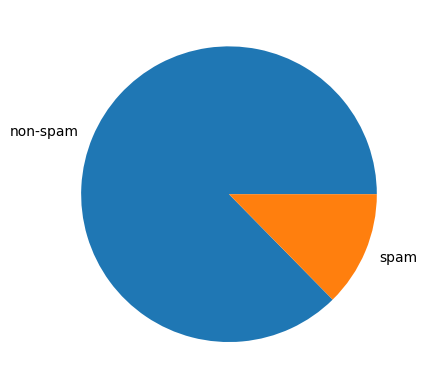

In [141]:
#no of spam and non spam
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['non-spam','spam'])
plt.show()

In [142]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [143]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
data['no_of_char']=data['text'].apply(len)
data.head()

,target,text,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [145]:
data['no_of_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [146]:
data.head()

,target,text,no_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [147]:
data['no_of_sen']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [148]:
data.head()

,target,text,no_of_char,no_of_words,no_of_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [149]:
data

,target,text,no_of_char,no_of_words,no_of_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [150]:
data[['no_of_char','no_of_words','no_of_sen']].describe()

,no_of_char,no_of_words,no_of_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [151]:
data[data['target']==0][['no_of_char','no_of_words','no_of_sen']].describe()

,no_of_char,no_of_words,no_of_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [152]:
#to get spam row  with no_of_char column
data[data['target']==1]['no_of_char']

2       155
5       148
8       158
9       154
11      136
       ... 
5537     90
5540    160
5547    160
5566    147
5567    161
Name: no_of_char, Length: 653, dtype: int64

<Axes: xlabel='no_of_char', ylabel='Count'>

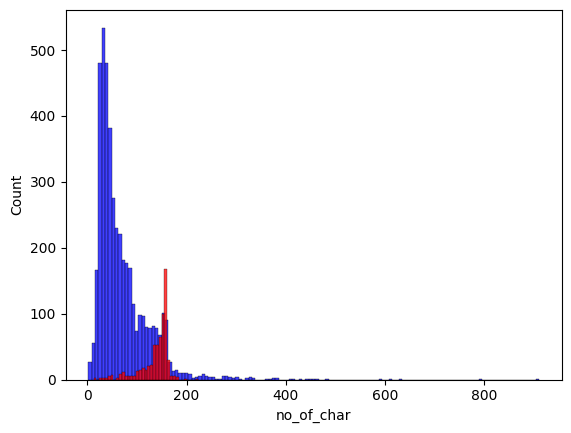

In [153]:
#plot them on char
import seaborn as sns
sns.histplot(data[data['target']==0]['no_of_char'],color='blue')
sns.histplot(data[data['target']==1]['no_of_char'],color='red')

<Axes: xlabel='no_of_words', ylabel='Count'>

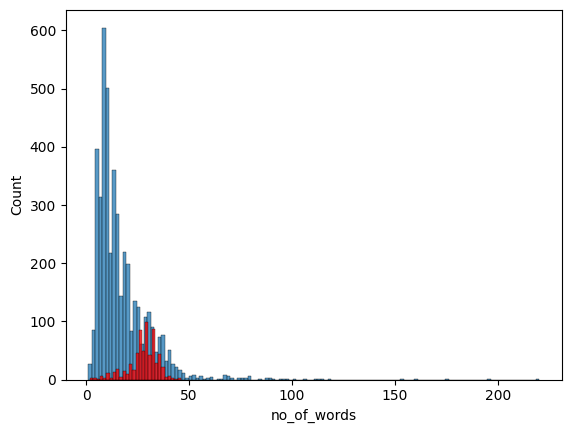

In [154]:
#on words
sns.histplot(data[data['target']==0]['no_of_words'])
sns.histplot(data[data['target']==1]['no_of_words'],color='red')

<Axes: xlabel='no_of_sen', ylabel='Count'>

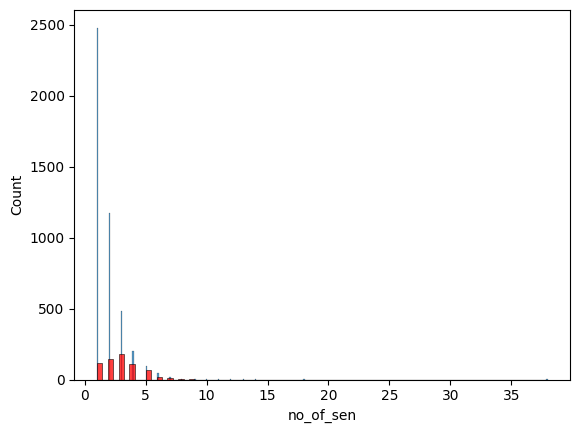

In [155]:
#on sentances
sns.histplot(data[data['target']==0]['no_of_sen'])
sns.histplot(data[data['target']==1]['no_of_sen'],color='red')

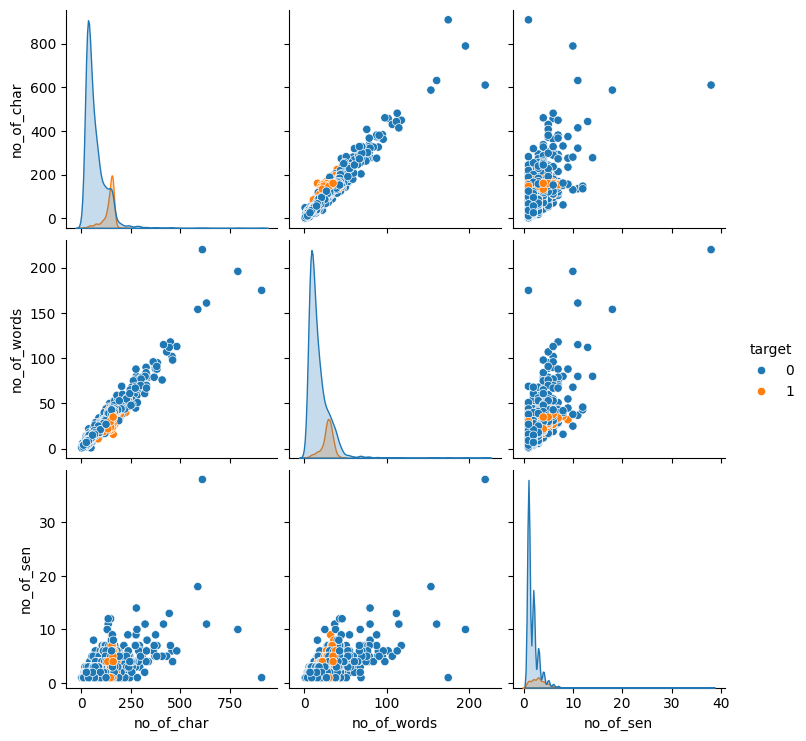

In [156]:
sns.pairplot(data,hue='target')

In [157]:
#data preprocessing
#lower case
#tokenizing
#remove special char puntuations stop words
#stemming

In [158]:
import nltk

In [159]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
print(stop)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [160]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('love')

'love'

In [161]:
def preprocess(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    res=[]
    for i in text:
        if(i.isalnum()):
            if(i not  in stop):
                res.append(ps.stem(i))
    return " ".join(res)
    

In [162]:
print(preprocess("Shiva reddy a love loves?))"))

shiva reddi love love


In [163]:
data['transformed_text']=data['text'].transform(preprocess)

In [164]:
data.head()

,target,text,no_of_char,no_of_words,no_of_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [165]:
#top 30 words in spam and non-spam
list=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        list.append(word)

In [166]:
from  collections import Counter
non_spam_words=pd.DataFrame(Counter(list).most_common(30))

In [167]:
non_spam_words.to_csv('non_spam_words.csv',index=False)
non_spam_words.head()


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


In [168]:
#for spam same process
list2=[]
for i in data[data['target']==1]['transformed_text']:
    for word in i.split():
        list2.append(word)
print(list)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [169]:
from collections import  Counter
spam_words=pd.DataFrame(Counter(list2).most_common(30))
spam_words.to_csv('spam_words.csv',index=False)
spam_words.head()


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [209]:
data.head()

,target,text,no_of_char,no_of_words,no_of_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [210]:
data['transformed_text'].isna().sum()

np.int64(0)

In [211]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
x = vectorizer.fit_transform(data['transformed_text']).toarray()

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,data['target'].values,test_size=0.2,random_state=2)

In [214]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
model1=GaussianNB()

model1.fit(x_train,y_train)
y1_predict=model1.predict(x_test)
print(accuracy_score(y_test,y1_predict))
print(confusion_matrix(y_test,y1_predict))
print(precision_score(y_test,y1_predict))

# good to use
model2=MultinomialNB()
model2.fit(x_train,y_train)
y2_predict=model2.predict(x_test)
print(accuracy_score(y_test,y2_predict))
print(confusion_matrix(y_test,y2_predict))
print(precision_score(y_test,y2_predict))


model3=BernoulliNB()
model3.fit(x_train,y_train)
y3_predict=model3.predict(x_test)
print(accuracy_score(y_test,y3_predict))
print(confusion_matrix(y_test,y3_predict))
print(precision_score(y_test,y3_predict))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182
0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [215]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(model2,open('model.pkl','wb'))